# Preprocessing

* python이 처음이라면 [Python Basic](https://colab.research.google.com/drive/1PCOoDIKypPVX9KTItMOht1cl96cPmeR_?authuser=1#scrollTo=3g6o04iLM0AF), [Python packages](https://colab.research.google.com/drive/1-1wx2VPEyNe11bmgpSpwdQgrJASCAqdH?authuser=1)를 먼저 학습하기를 권한다.

* package를 쉽게 설치하기 위해 Anaconda 사용을 권장한다.

경기과학고등학교 관측천문학 강좌를 위해 만들었으며  <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">크리에이티브 커먼즈 저작자표시-비영리-동일조건변경허락 4.0 국제 라이선스</a>에 따라 이용할 수 있음.

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="크리에이티브 커먼즈 라이선스" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a>


# Preprocessing

과학적으로 데이터를 분석하기 위해서는 **preprocessing**을 해야 하는데 이 과정에서 그동안 배운 내용을 기초로 스스로 코딩하기를 권한다.

IRAF의 `CCDPROC`에 있는 것들을 astropy의 [`ccdproc`](http://ccdproc.readthedocs.io/en/stable/index.html)를 사용해 볼 수 있다. 

`ccdproc`가 설치되지 않았다면 'anaconda prompt' 창에서 다음과 같이 입력한다.

    >conda install ccdproc
    
    
# Image Combine

image combine은 앞서 [`배운 내용 : 08_5_combine_fits_file_mono_16bit`](https://github.com/guitar79/OA-2018/blob/master/08_5_combine_fits_file_mono_16bit.ipynb)과 동일하게 수행할 수 있다.
앞으로는 그 두 가지 방법 중에서 'ccdproc' package를 이용할 예정이다. 

'ccdproc'와 관련된 자세한 내용은 [`manual`](http://ccdproc.readthedocs.io/en/stable/api/ccdproc.combine.html#ccdproc.combine) 을 참고한다.

combine 할 file list가 포함된 file을 생성하거나, list를 코드에 직접 적어주는 방법이 있다.



## 1. Shell and Python Scripting

spyder IDE의 Ipython console을 사용하면 LINUX commands를 사용할 수도 있다. 

Windows와 linux의 command가 약간의 차이가 있으니 익숙해 지는 것이 좋다. 이 방법은 file list를 만드는데 유용하다.

```ipython
In [1]: mkdir bias              # directory  생성
In [2]: mv *b.fits bias/        # *.fits file을 bias directory로 이동
In [3]: cd bias/
In [4]: ls *.fits > bias.list   # *.fits file 목록을 bias.list로 저장
In [5]: cd ..

In [6]: mkdir dark      
In [7]: mv *d.fits dark/
In [8]: cd dark/
In [9]: ls *.fits > dark.list
In [10]: cd ..

In [11]: mkdir flat
In [12]: mv *f.fits flat/
In [13]: cd flat/
In [14]: ls *.fits > flat.list
In [15]: cd ..

In [16]: mkdir object
In [17]: mv *.fits object/
In [18]: cd object/
In [19]: ls *.fits > object.list
In [20]: cat object.list
    0001.fits
    ....
    0010.fits
# You can do "cat bias.list" to see the contents in "bias.list"
# See the figure included below.
```
        
Then you have a file '`bias.list`' in the directory '`bias`', with all the 10 bias images, etc. A part of an example:

<img src='images/spyder_01.png' width=300>


* **TIP**: You now may know, but there are many useful shortcuts in spyder:
 * `F9`: run the current line (identical to copy the line, paste it on console, and hit enter)
 * Using "`#%%`": making a "cell". Spyder will automatically highlight the cell you are in. If you hit `ctrl+enter`,  all the lines in the current cell will be run (same as drag lines and hit `F9`) while the cursor remains the position. If you hit `shift+enter`, the cursor will evolve to the next cell so that you can run the next cell again by hitting `shift+enter`.
 * `ctrl+1`: Comment the lines you selected. I changed it to `ctrl+/`, which is more widely used such as in `Atom`.
 * `ctrl+4`: Make a comment box. Try it!
 

## 2. Dealing with Bias 

bias image는 관측을 시작하기 전 각 픽셀 초기 값이 0 이 되어야 하는데, 실제로는 그렇지 않기 때문에 생기는 영상이다 이 noise는 픽셀들의 기계적인 원인 때문에 발생하는 것이며 관측시 각 픽셀들은 반드시 몇 개의 전자를 가지고 관측을 시작하게 된다 

이러한 전자에 의해 생기는 noise는 bias image를 촬영하여 다음의 과정으로 보정이 가능하다.

* 광자가 모이기 힘들 정도의 최대한 짧은 exposure time으로 bais image를 가능한 한 여려 장(10 ~ 20 frame) 촬영한다.
* all bias image를 median 방법으로 combine 하여 얻은 master bias image를 "bias-median.fits"로 저장한다.
* bias image는 filter에 무관하다.
* 다만 저장시에 data type에 유의해야 하는데, ccdproc로 저장한후 data type을 확인하는 것이 좋다.

[`bias example`](https://drive.google.com/open?id=1bx-ZtTus1q43l4Rx2d2uAhIpG8rC_Loo)


In [ ]:
#%%
from ccdproc import combine
#%%
#filelist = np.loadtxt('file.list', dtype=bytes).astype(str)
dir_name = '20170220_m35/'
f_name_bias = 'bias-median.fits'
#%%
bias_list = [dir_name+'bias-e-2X2-001.fits', dir_name+'bias-e-2X2-002.fits',\
            dir_name+'bias-e-2X2-003.fits', dir_name+'bias-e-2X2-004.fits',\
            dir_name+'bias-e-2X2-004.fits', dir_name+'bias-e-2X2-006.fits',\
            dir_name+'bias-e-2X2-005.fits', dir_name+'bias-e-2X2-008.fits',\
            dir_name+'bias-e-2X2-006.fits', dir_name+'bias-e-2X2-010.fits']
#%%
bias = combine(bias_list,       # ccdproc does not accept numpy.ndarray, but only python list.
               method='median',         # default is average so I specified median.
               unit='adu')              # unit is required: it's ADU in our case.
print('bias', bias.data.dtype, bias.data.max(), bias.data.min(), bias )
#%%
#save fits file
bias.write(dir_name+f_name_bias, overwrite =True)

## 3. Dealing with Dark Current

dark current는 CCD가 빛을 받지 않더라도 실리콘 격자의 열진동에 의하여 pixel에서 만들어진 신호를 말한다. 즉, 실리콘 격자의 온도가 높으면 가전자의 일부가 튀어나오게 되는데 이러한 전자들이 신호를 만드는 것이다. 이러한 암전류는 온도가 높을수록, 그리고 exposure time에 비례하게 나타난다.

CCD를 냉각하여 dark current를 줄여줄 수 있으나, 완전히 제거할 수는 없으므로 dark image를 찍어서 이를 제거해 준다. 
dark current는 시간의 linear function 이므로 dark image의 exposure time을 `t` second라고 하고, `t` second에 대한 dark 값을 `dark(t)`라 한다면 

$dark(1) = \frac{(dark(t) - bias)}{t}$ 이다. 

그런 다음 대상 이미지의 노출 시간이 't'인 경우 'dark(1)'에 't'를 곱한 다음 'master dark'로 사용하면 dark image를 촬영하는 시간을 절약할 수 있다

그러나 dark image는 대상을 촬영한 것과 exposeure time을 같게 하여 촬영하는 것이 일반적이다.

이러한 전자에 의해 생기는 noise는 dark current noise라고 하며 dark image를 촬영하여 다음의 과정으로 보정이 가능하다.

* 셔터를 닫은 상태에서 calibration을 수행할 object image와 같은 온도, 같은 exposure time으로 dark image를 가능한 한 여려 장(10 ~ 20 frame) 촬영한다.
* all dark image를 median 방법으로 combine 한 후 exposure time으로 나누어 "dark0-median.fits"로 저장한다.
* dark0 값에서 master bias를 빼준다.
* 그리고 3-sigma clip with 10 iterations 처리해 준다. 
* set the rejected pixel values as the median value
* save it as "dark-median.fits"
* dark image는 filter에 무관하다.
* 다만 저장시에 data type에 유의해야 하는데, ccdproc로 저장한후 data type을 확인하는 것이 좋다.

[`dark example`](https://drive.google.com/open?id=1D2GTA6PwCihTjirayLiQScJQZKsixPeb)


In [ ]:
#%%
import numpy as np
from astropy.stats import sigma_clip
from ccdproc import CCDData, ccd_process, combine
#%%
#filelist = np.loadtxt('dark.list', dtype=bytes).astype(str)
dir_name = '20170220_m35/'
dark_list = [dir_name+'dark-e-2X2-011.fits', dir_name+'dark-e-2X2-012.fits',\
            dir_name+'dark-e-2X2-013.fits', dir_name+'dark-e-2X2-014.fits',\
            dir_name+'dark-e-2X2-014.fits', dir_name+'dark-e-2X2-016.fits',\
            dir_name+'dark-e-2X2-015.fits', dir_name+'dark-e-2X2-018.fits',\
            dir_name+'dark-e-2X2-016.fits', dir_name+'dark-e-2X2-020.fits']
#%%
f_name_bias = 'bias-median.fits'
f_name_dark0 = 'dark0-median.fits'
f_name_dark = 'dark-median.fits'
#%%
dark0 = combine(dark_list,       # ccdproc does not accept numpy.ndarray, but only python list.
               method='median',         # default is average so I specified median.
               unit='adu')   
#%%
#save fits file
dark0.write(dir_name+f_name_dark0, overwrite =True)
print('dark0', dark0.data.min(), dark0.data.max(), dark0)
# This dark isn't bias subtracted yet, so let's subtract bias:               
#%%
# (1) Open master bias
bias = CCDData.read(dir_name+f_name_bias, unit='adu')
print('bias', bias.data.min(), bias.data.max(), bias.data)
# `unit='adu'` does not necessarily be set if you have header keyword for it.
#%%
# (2) Subtract bias:
dark = ccd_process(dark0, master_bias=bias) 
print('dark', dark.data.min(), dark.data.max(), dark.data)
# This automatically does "dark-bias"
# You can do it by the function "subtract_bias", or just normal pythonic arithmetic.
#%%
# (3) Sigma clip the dark
dark_clip = sigma_clip(dark) 
print('dark_clip', dark_clip.data.min(), dark_clip.data.max(), dark_clip.data)
# by default, astropy.stats.sigma_clip does "3-sigma, 10-iterations" clipping.
# You can tune the parameters by optional keywords (e.g., sigma, iters, ...).
# dark_clip is "numpy masked array". It contains data, mask, and filled_value.
# filled_value is the value which is used to fill the data which are masked (rejected).
# I will change filled_value to be the median value.
#%%
# (4) For rejected pixels, insert the median value
dark_clip.fill_value = np.median(dark_clip.data) 
dark.data = dark_clip.filled() # ~.filled() gives the "data array using filled_value"
print('dark', dark.data.dtype, dark.data.min(), dark.data.max(), dark.data)
#%%
# (5) Save
dark.write(dir_name+f_name_dark, overwrite =True)

bias image 를 load  할 때 다음과 같은 `INFO` message가 표시될 수도 있다.

    INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [ccdproc.ccddata]

이는 FITS가 자체 단위 (헤더 키워드 'UNIT')를 가지고 있는데, FITS file에 'adu'단위를 할당했기 때문이다. CCDData object를 ADU unit으로 저장했기 때문에 무시해도 된다.

dark image의 ADU 값은 작지만 제거해 주는 것이 좋다. 


## 3. Dealing with Flat

다음으로 생각해 보아야 할 것은 픽셀들 간의 양자효율에 대해서 생각해 보아야 한다. 다시 말해 를 이루고 있는 픽셀들이 똑같은 빛에 대해서 똑같은 비율로 반응하는가 하는 문제이다. 또한 광학계의 vignetting이나, filter 앞의 먼지 등으로 각 픽셀들의 양자 효율이 달라질 수 있다. 

이 error는 flat image를 촬영하여 보정해 준다.

flat image를 촬영하여 bias와 dark를 제거하여 master flat을 만드는 과정은 다음과 같다. 

* 해 질 무렵 동쪽 하늘이나 해 뜰 무렵 서쪽하을 이 flat 한 하늘로 볼 수 있다. $ADU$ 값이 25,000 전후가 되도록 flat image를 가능한 한 여려 장(8 ~ 10 frame) 촬영한다.
* flat image는 마다 따로 촬영하여야 한다. 
* all flat image를 median 방법으로 combine "flat0-median.fits"로 저장한다.
* flat0 값에서 bias 와 dark (dark should be scaled)를 빼 준다.
* save it as "flat.fits"
* save it as "flat-median.fits"
* 다만 저장시에 data type에 유의해야 하는데, ccdproc로 저장한후 data type을 확인하는 것이 좋다.

[`flat example`](https://drive.google.com/open?id=1qifdZ65wqVVsNMdyn4dIHmpBZJWQQ6mI)

flat image에는 spatial variation가 있기 때문에 rejected pixel values 들을 모든 픽셀의 median value로 대체 할 수 없다. 보통은 lower limit of pixel value (`min_value`)를 설정하고 이 값보다 작은 픽셀 값을 바꾸는 것이 일반적인 방법이다. 'min_value '보다 작은 픽셀을 'min_value'로 변경하자. 

앞서 언급했지만 dark frame은 노출시간에 맞게 `dark(t)/t * t'` 의 방법으로 "scaled" 되어야 한다. 이 과정은 `ccd_process` fucntion 의 "`dark_scale`" 에서 자동 조정된다.


In [ ]:
#%%
from ccdproc import CCDData, ccd_process, combine
import astropy.units as u
#%%
#filelist = np.loadtxt('dark.list', dtype=bytes).astype(str)
dir_name = '20170220_m35/'
flat_list = [dir_name+'flatB-e-2X2-001.fits', dir_name+'flatB-e-2X2-001.fits',\
            dir_name+'flatB-e-2X2-001.fits', dir_name+'flatB-e-2X2-001.fits',\
            dir_name+'flatB-e-2X2-001.fits']
#%%
f_name_bias = 'bias-median.fits'
f_name_dark = 'dark-median.fits'
f_name_flat0 = 'flat0-median.fits'
f_name_flat = 'flat-median.fits'

#%%
flat0 = combine(flat_list,       # ccdproc does not accept numpy.ndarray, but only python list.
               method='median',         # default is average so I specified median.
               unit='adu')  

#%%
# write fits file
flat0.write(dir_name+f_name_flat0, overwrite =True)
print('flat0', flat0.data.min(), flat0.data.max(), flat0)
# This dark isn't bias subtracted yet, so let's subtract bias:               

#%%
# (1) Open master bias and dark
bias = CCDData.read(dir_name+f_name_bias, unit='adu')
dark = CCDData.read(dir_name+f_name_dark, unit='adu') 

#%%
# (2) Subtract bias and dark
flat = ccd_process(flat0,                  # The input image (median combined flat)
                   master_bias=bias,       # Master bias
                   dark_frame=dark,        # dark
                   dark_exposure=140 * u.s, # exposure time of dark
                   data_exposure=5.84 * u.s, # exposure time of input image (flat)
                   dark_scale=True)        # whether to scale dark frame
print('flat', flat.data.dtype, flat.data.min(), flat.data.max(), flat)

#%%
# (3) Save
flat.write(dir_name+f_name_flat, overwrite =True)


dark image나 data image의 exposure times 은 header에 기록되어 있으므로 header keyword `EXPTIME` (or sometimes `EXPOSURE`)을 이용하여 확인하여야 한다. unit도 FITS에 따라 다를수 있으나 seconds를 사용하는 경우가 많다. 

아래의 code는 명시 적으로 노출 시간을 지정하지 않고, header 정보를 읽어 자동으로 위와 동일한 process를 수행 할 수 있습니다.

``` python
flat = ccd_process(flat0,                  
                   master_bias=bias,       
                   dark_frame=dark,        
                   exposure_key='exptime', # the header keyword for exposure time
                   exposure_unit=u.s,      # the unit of exposure time
                   dark_scale=True)        
```

이것이 더 유용할 것으로 생각된다.

-----

## 4. Reducing Object Images

위의 과정으로 master bias, master dark, 그리고 master flat (median combined flat - (bias + dark))을 만들었다면 간단하게 (object - (bias + dark)) / (master flat) 과정으로 calibration을 할 수 있다. 

이 모든 preprocessing 과정을 한번에 하는 방법은 다음과 같다. 

[`object example`](https://drive.google.com/open?id=1nsGqUhy9c-7Cc1pTUt6VUMpVrFOJgulf)


In [ ]:
import numpy as np
from ccdproc import CCDData, ccd_process
import astropy.units as u

#filelist = np.loadtxt('dark.list', dtype=bytes).astype(str)
dir_name = '20170220_m35/'
file_list = [dir_name+'g3035811.fits', dir_name+'g3035812.fits',\
            dir_name+'g3035813.fits', dir_name+'g3035814.fits',\
            dir_name+'g3035815.fits', dir_name+'g3035816.fits',\
            dir_name+'g3035817.fits', dir_name+'g3035818.fits',\
            dir_name+'g3035819.fits', dir_name+'g3035820.fits']

f_name_bias = 'bias-median.fits'
f_name_dark = 'dark-median.fits'
f_name_flat0 = '/flat0-median.fits'

# (1) Open master bias, dark, and flat
bias = CCDData.read(dir_name+f_name_bias, unit='adu')
dark = CCDData.read(dir_name+f_name_dark, unit='adu') 
flat0 = CCDData.read(dir_name+f_name_flat0, unit='adu')  # Bias NOT subtracted

# (2) Reduce each object image separately.
#     Then save it with prefix 'p_' which means "preprocessed"
for objname in file_list[0:2]:
    obj = CCDData.read(objname, unit='adu')
    reduced = ccd_process(obj,                    # The input image
                          master_bias=bias,       # Master bias
                          dark_frame=dark,        # dark
                          master_flat=flat0,      # non-calibrated flat
                          min_value=30000,        # flat.min() should be 30000
                          exposure_key='exptime', # exposure time keyword
                          exposure_unit=u.s,      # exposure time unit
                          dark_scale=True)        # whether to scale dark frame
    reduced.data = np.array(reduced.data, dtype=np.uint16)
    print('reduced', reduced.data.dtype, reduced.data.min(), reduced.data.max(), reduced)
    reduced.write(objname[:-5]+'_p.fits', overwrite =True)



## 5. Implementing WCS

image file을 [Astrometry.net](http://nova.astrometry.net/upload) 에 업로드 하여 World Coordinate System (WCS)을 이용해 볼 수 있다. 

만약 WCS matching이 성공적으로 끝나면 다음과 같은 페이지를 볼 수 있고 다운받을 수 있다. 

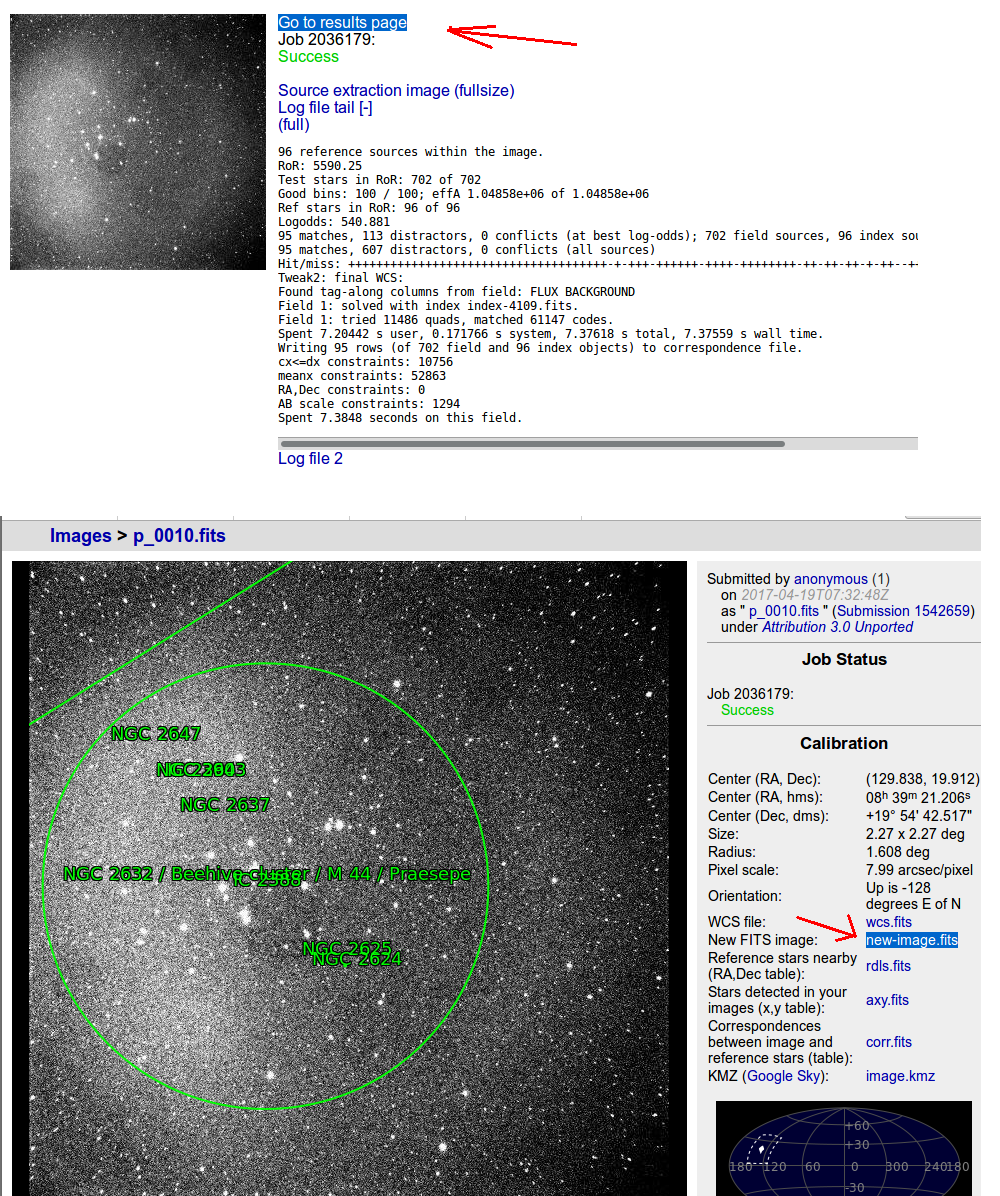

In [1]:
from IPython.display import Image
Image('images/preproc_astrometry.png', width=600)